In [15]:
import numpy as np
import scipy.constants as ct
import random
import matplotlib.pyplot as plt

import json

~ 2023.07.31 : no beta
~ 2023.08.01 : beta value edit

In [45]:
k = np.linspace(1,10,100)
tau = np.linspace(0,1,100)
b = 1

#unit = 1e-21 


In [31]:
def bose_dist(x):

    T = 273
    #boltz = ct.k*Ts

    return 1/(np.exp(x*b)-1)

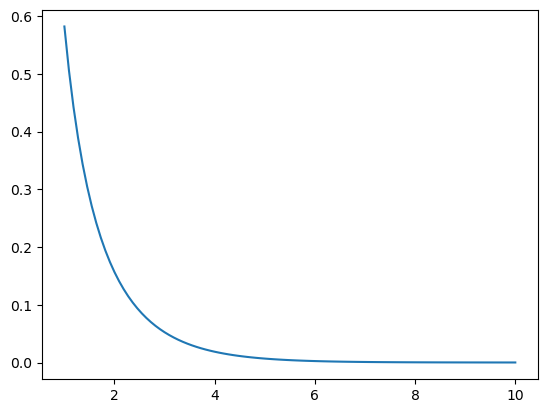

In [51]:
plt.plot(k,bose_dist(k))
plt.show()

In [33]:
def green(tau,k):

    #for i in range(len(tau)):
        #if tau[i] > 0:
            #return (bose_dist(k)+1)*np.exp(-k*tau)
        #if tau[i] < 0:
            #return (bose_dist(k))*np.exp(-k*tau)
        return ((bose_dist(k)+1)*np.exp(-k*tau)) + (bose_dist(k))*np.exp(k*tau)

In [53]:
def omega(v):
    return v*np.abs(k)

def coupling(v,g,W):
    w = omega(v)
    cut_off = W
    return g*np.sqrt(w/(1+(w/cut_off)**2))

def interact(tau):

    file_path = "./data.json"

    with open(file_path, 'r') as file:
        data = json.load(file)
    
    v = data['v']
    g = data['g']
    W = data['W']

    g_k = np.abs(coupling(v,g,W))**2

    n = len(k)
    m = len(tau)

    k_sum = np.zeros(n)
    t_array = np.zeros(m)

    for j in range(n):
        t = tau[j]
        for i in range(n):
            k_sum[i] = g_k[i] * green(t,v*k)[i]
        t_array[j] = np.sum(k_sum)
        k_sum = np.zeros(len(k))
    
    #print(t_array)
    return t_array


392.66790860306793


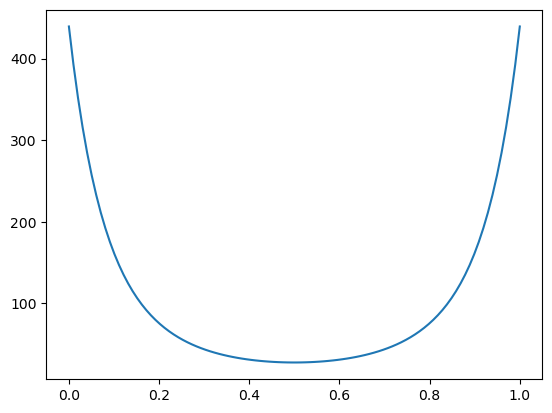

In [47]:
print(interact(tau)[1])
plt.plot(tau,interact(tau))
plt.xlabel=('tau')
plt.ylabel=('V(tau)')

plt.show()

In [56]:
def output(x):
    """numpy를 이용해 데이터를 dat 형식으로 출력하며, x에는 주어지는 tau값만 넣어서 사용하는 함수입니다."""
    import numpy as np

    a = x
    b = interact(tau)

    df = np.column_stack((a,b))

    np.savetxt('COUPTEST.dat',df)
    
    return

In [57]:
output(tau)